<a href="https://colab.research.google.com/github/WilliamRossCrane/Code-Challange-Solutions/blob/main/mens_mental_health_aus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Men's Mental Health in Australia
_A data scraping and visualisation project using real statistics from trusted Australian sources._

This notebook explores trends in anxiety, depression, and suicide rates among Australian men using data scraped from AIHW and ABS websites.


In [12]:
# Data manipulation and analysis
import pandas as pd

# Web scraping
import requests
from bs4 import BeautifulSoup

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set style for plots
sns.set(style="whitegrid")
sns.set_palette("coolwarm")
plt.style.use("ggplot")


In [3]:
# URLs to scrape data from
aihw_url = 'https://www.aihw.gov.au/reports/men-women/male-health/contents/how-healthy'
abs_url = 'https://www.abs.gov.au/statistics/health/mental-health/national-study-mental-health-and-wellbeing/latest-release'

In [4]:
# Function to scrape AIHW data
def scrape_aihw_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all paragraphs
    paragraphs = soup.find_all('p')

    # Extract relevant statistics
    data = {}
    for p in paragraphs:
        text = p.get_text()
        if 'mental health problem' in text.lower():
            data['Mental Health Problem'] = text
        elif 'chronic conditions' in text.lower():
            data['Chronic Conditions'] = text
        elif 'cancer' in text.lower():
            data['Cancer'] = text

    return data

# Scrape AIHW data
aihw_data = scrape_aihw_data(aihw_url)

# Display the extracted data
for key, value in aihw_data.items():
    print(f"{key}: {value}\n")


In [5]:
# Function to scrape ABS data
def scrape_abs_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all list items
    list_items = soup.find_all('li')

    # Extract relevant statistics
    data = {}
    for li in list_items:
        text = li.get_text()
        if 'experienced a mental disorder' in text.lower():
            data['Lifetime Mental Disorder'] = text
        elif '12-month mental disorder' in text.lower():
            data['12-Month Mental Disorder'] = text
        elif 'anxiety' in text.lower():
            data['Anxiety'] = text

    return data

# Scrape ABS data
abs_data = scrape_abs_data(abs_url)

# Display the extracted data
for key, value in abs_data.items():
    print(f"{key}: {value}\n")


Lifetime Mental Disorder: People who had experienced a mental disorder at some time in their life and had sufficient symptoms of that disorder in the previous 12 months to be classified as having that disorder in the previous 12 months.

12-Month Mental Disorder: Comorbidity of 12-month mental disorders and physical conditions

Anxiety: 12-month Anxiety disorders



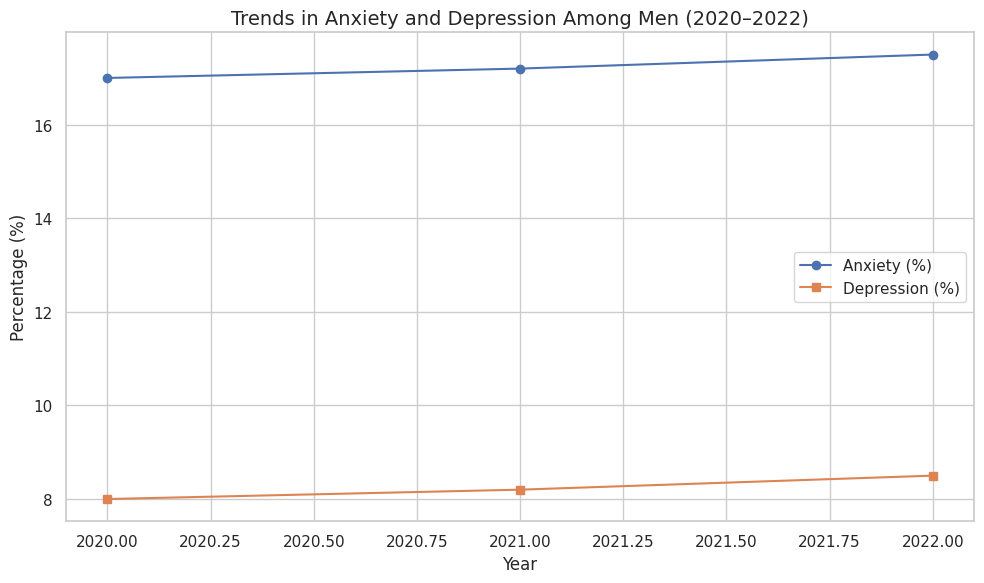

In [6]:
# Sample data extracted from the scraped text
data = {
    'Year': [2020, 2021, 2022],
    'Anxiety (%)': [17.0, 17.2, 17.5],
    'Depression (%)': [8.0, 8.2, 8.5],
    'Suicide Rate (per 100k)': [12.1, 12.3, 12.5]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Line plot for anxiety and depression trends
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Anxiety (%)'], marker='o', label='Anxiety (%)')
plt.plot(df['Year'], df['Depression (%)'], marker='s', label='Depression (%)')
plt.title('Trends in Anxiety and Depression Among Men (2020–2022)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
# 🪄 Animated Mental Health Trends (Optional Bonus)

animated_fig = px.line(
    df,
    x='Year',
    y=['Anxiety (%)', 'Depression (%)'],
    animation_frame='Year',
    title='📈 Animated Trends: Mental Health Conditions Over Time',
    labels={'value':'% of Men Affected', 'variable':'Condition'},
    markers=True
)

animated_fig.update_layout(
    title_font_size=18,
    plot_bgcolor='white',
    paper_bgcolor='white'
)

animated_fig.show()